   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


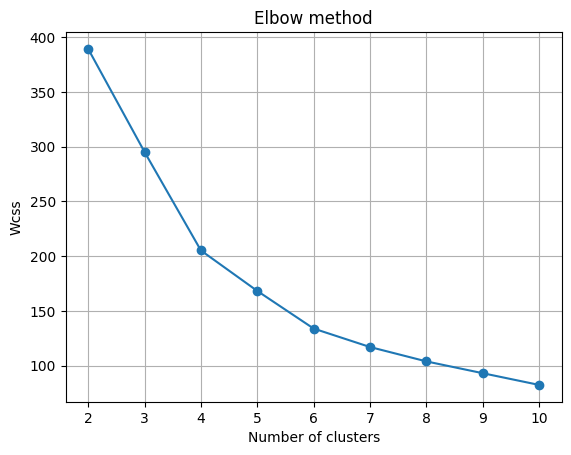

In [7]:
import pandas,numpy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
df=pandas.read_csv("Mall_Customers - Mall_Customers.csv")
print(df.head())
features=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
s=StandardScaler()
ss=s.fit_transform(features)
for k in range(2,11):
    ke=KMeans(n_clusters=k,random_state=42,n_init=10)
    ke.fit(ss)
    wcss.append(ke.inertia_)
plt.plot(range(2,11),wcss,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Wcss")
plt.title("Elbow method")
plt.grid(True)
plt.show()

In [9]:
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    lb=kmeans.fit_predict(ss)
    score=silhouette_score(ss,lb)
    print(f"k={k} ,silhouette score={score:.3f}")
    

k=2 ,silhouette score=0.335
k=3 ,silhouette score=0.358
k=4 ,silhouette score=0.404
k=5 ,silhouette score=0.408
k=6 ,silhouette score=0.431
k=7 ,silhouette score=0.410
k=8 ,silhouette score=0.367
k=9 ,silhouette score=0.374
k=10 ,silhouette score=0.362


In [10]:
op=6
kmeans=KMeans(n_clusters=op,random_state=42)
df['Cluster']=kmeans.fit_predict(ss)


In [11]:
print(df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean())

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        32.692308           86.538462               82.128205
2        25.560000           26.480000               76.240000
3        26.125000           59.425000               44.450000
4        44.000000           90.133333               17.933333
5        45.523810           26.285714               19.380952


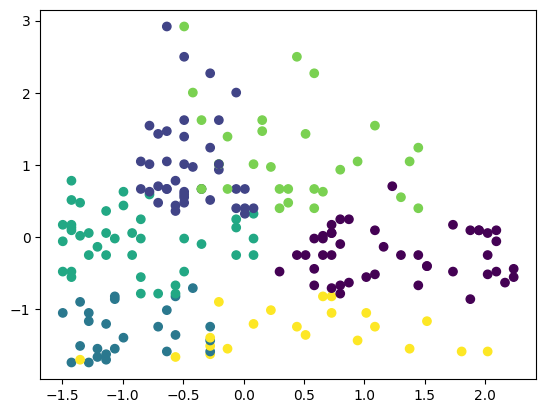

In [13]:
plt.scatter(ss[:,0],ss[:,1],c=df['Cluster'],cmap='viridis')
plt.show()